<a href="https://colab.research.google.com/github/Radhikakhot66-VCTI/Python_libraries/blob/Pavan/L4_Buffering_SpatialRelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
path = r"/content/drive/MyDrive/Colab Notebooks/GeoPandas/files/ne_110m_admin_0_countries.shp"
world = gpd.read_file(path)
world_m = world.to_crs(epsg=3857)
india = world_m[world_m["ADMIN"] == "India"]
india_buffer = india.buffer(500_000)
within_500km = world_m[world_m.intersects(india_buffer.unary_union)]

/tmp/ipython-input-2-3019902824.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  within_500km = world_m[world_m.intersects(india_buffer.unary_union)]


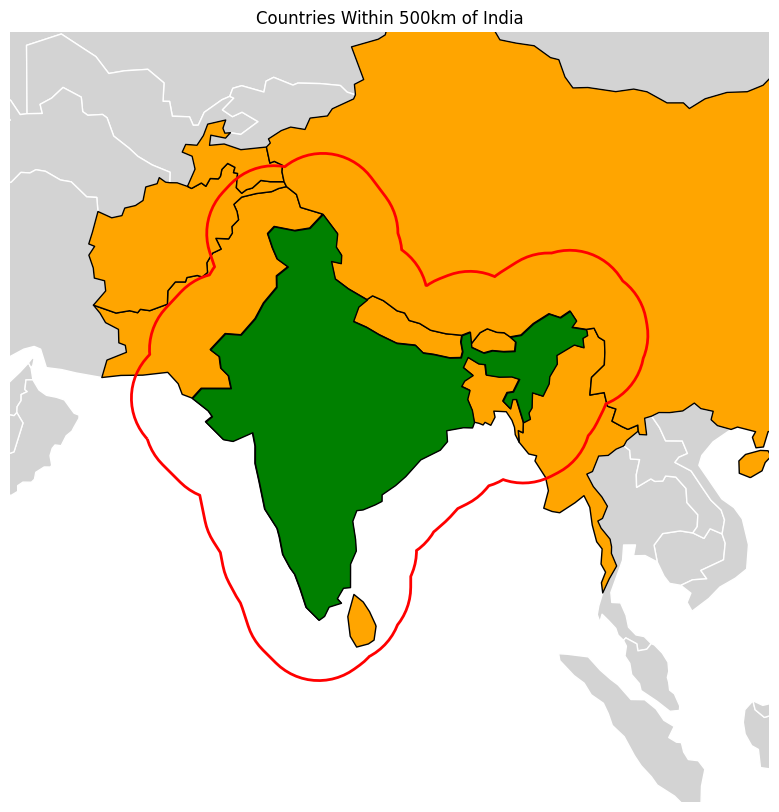

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
world_m.plot(ax=ax, color="lightgray", edgecolor="white")
within_500km.plot(ax=ax, color="orange", edgecolor="black")
india.plot(ax=ax, color="green", edgecolor="black")
gpd.GeoSeries(india_buffer).plot(ax=ax, color="none", edgecolor="red", linewidth=2)

minx, miny, maxx, maxy = india_buffer.total_bounds
ax.set_xlim(minx - 1e6, maxx + 1e6)
ax.set_ylim(miny - 1e6, maxy + 1e6)

plt.title("Countries Within 500km of India")
plt.axis("off")
plt.show()